# 📊 Regressione Lineare con il Dataset delle Altezze

In questo notebook esploreremo un dataset contenente l'altezza dei padri (`fheight`) e dei figli (`sheight`), con l'obiettivo di costruire un modello di regressione lineare per prevedere l'altezza del figlio conoscendo quella del padre.

---

## Obiettivo

Guidarti passo dopo passo attraverso il ciclo di vita di un progetto di *Machine Learning supervisionato*, includendo:
- Esplorazione dei dati
- Preprocessing
- Addestramento del modello
- Valutazione
- Visualizzazione dei risultati


## 🔍 1. Esplorazione del dataset

### ✏️ Esercizio 1.1
Carica il dataset `pearson_dataset.csv` e stampa le prime 5 righe per esplorare la struttura dei dati.


In [8]:
# Qui faccio l'esercizio 1.1
import pandas as pd
Dataframe = pd.read_csv("pearson_dataset.csv")
Dataframe.head()


,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


### ✏️ Esercizio 1.2
Calcola media, mediana e deviazione standard delle due colonne `fheight` e `sheight`.


In [2]:
# Qui esercizio 1.2
x = Dataframe.mean()
y = Dataframe.median()
z = Dataframe.std()

print(x)
print(y)
print(z)

fheight    67.687097
sheight    68.684070
dtype: float64
fheight    67.76660
sheight    68.61582
dtype: float64
fheight    2.744868
sheight    2.814702
dtype: float64


### ✏️ Esercizio 1.3
Invoca la funzione per disegnare uno scatterplot con `fheight` sull'asse X e `sheight` sull'asse Y per visualizzare la relazione tra le due variabili.




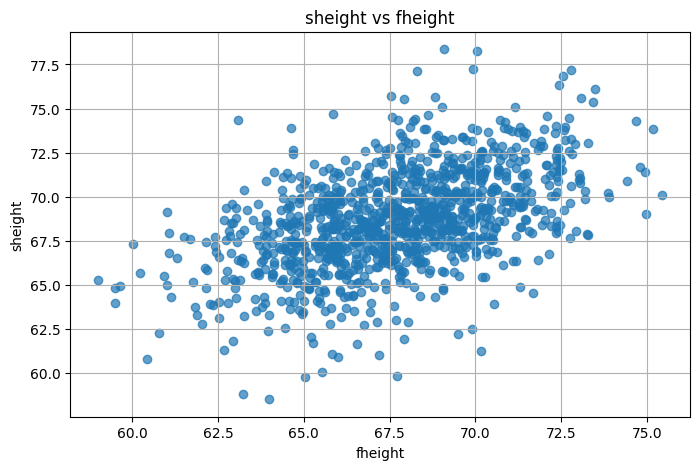

In [6]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_col, y_col, x_label=None, y_label=None, title=None):
    """
    Crea uno scatter plot generico tra due colonne di un DataFrame.

    Parametri:
    - df: pandas DataFrame contenente i dati
    - x_col: nome della colonna da usare sull'asse X
    - y_col: nome della colonna da usare sull'asse Y
    - x_label: etichetta asse X (opzionale)
    - y_label: etichetta asse Y (opzionale)
    - title: titolo del grafico (opzionale)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.title(title if title else f"{y_col} vs {x_col}")
    plt.grid(True)
    plt.show()

# Esempio d'uso
# plot_scatter(df, "fheight", "sheight", "Altezza del padre", "Altezza del figlio", "Relazione tra altezze")

plot_scatter(Dataframe, "fheight", "sheight")

## 🧹 2. Preprocessing dei dati

### ✏️ Esercizio 2.1
Verifica se ci sono valori nulli nel dataset.


In [9]:
# Esercizio 2.1
Dataframe.isnull().sum()

fheight    0
sheight    0
dtype: int64

### ✏️ Esercizio 2.2
Standardizza o normalizza i dati (opzionale) per sperimentare come cambiano i risultati.


<Axes: ylabel='Density'>

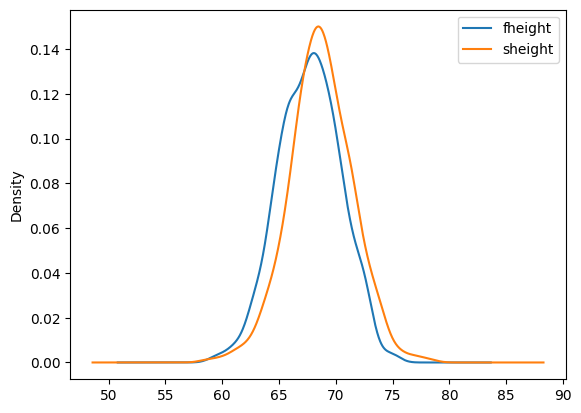

In [8]:
# Esercizio 2.2
import pandas as pd
Dataframe = pd.read_csv("pearson_dataset.csv")
Dataframe.plot.kde()


<function matplotlib.pyplot.show(close=None, block=None)>

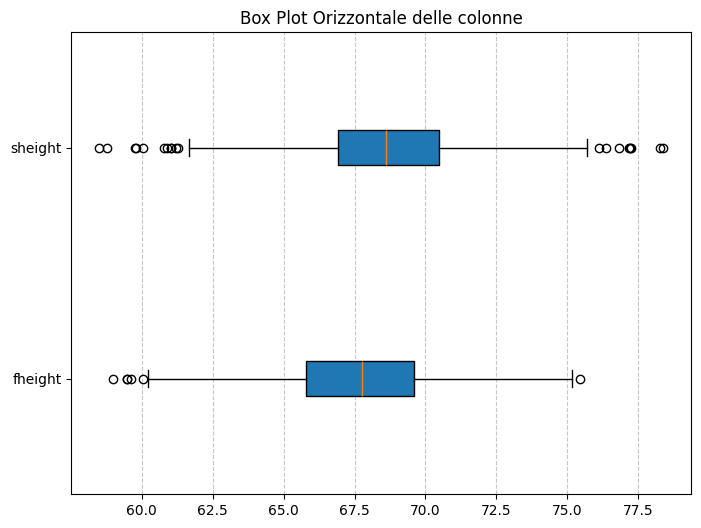

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(Dataframe.values,vert=False,patch_artist=True)

plt.yticks(range(1,len(Dataframe.columns)+1),Dataframe.columns)

plt.title("Box Plot Orizzontale delle colonne")
plt.grid(axis="x",linestyle="--", alpha=0.7)

plt.show

### ✏️ Esercizio 2.3
Disgnare lo scatter plot del Dataframe, calcolare outlier, filtrare data frame in modo che contenga solo valori compresi nell'intervallo [Q1 - IQR * 1.5, Q3 + IQR*1.5] e disegnare lo scatter plot dei valori non considerati come outlier.


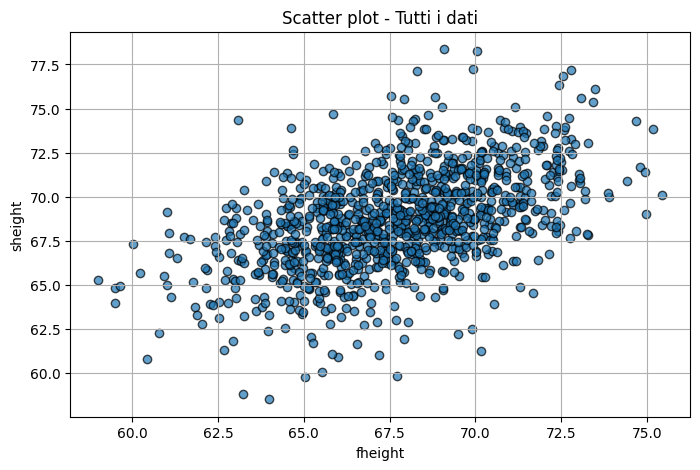

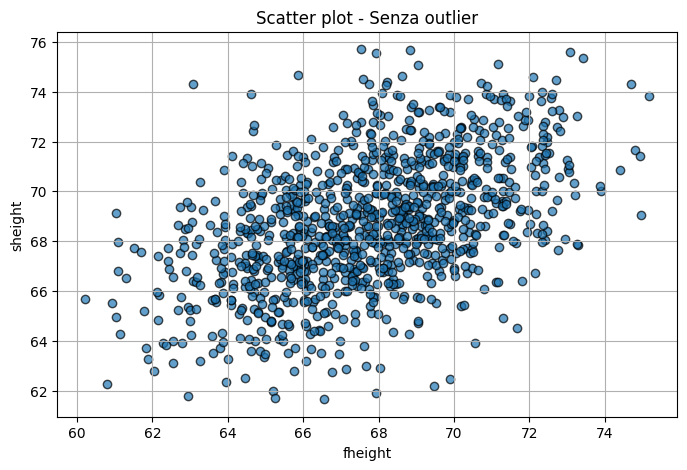

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei dati
Dataframe = pd.read_csv("pearson_dataset.csv")

# Funzione per disegnare uno scatter plot
def plot_scatter(df, x_col, y_col, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], alpha=0.7, edgecolors='k')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.show()

# 1. Disegna lo scatter plot originale
plot_scatter(Dataframe, "fheight", "sheight", "Scatter plot - Tutti i dati")

# 2. Calcola outlier con metodo IQR
Q1 = Dataframe[["fheight", "sheight"]].quantile(0.25)
Q3 = Dataframe[["fheight", "sheight"]].quantile(0.75)
IQR = Q3 - Q1

# 3. Filtro per identificare i non-outlier
mask_non_outlier = ~((Dataframe[["fheight", "sheight"]] < (Q1 - 1.5 * IQR)) |
                     (Dataframe[["fheight", "sheight"]] > (Q3 + 1.5 * IQR))).any(axis=1)

# Crea DataFrame filtrato
filtered_df = Dataframe[mask_non_outlier]

# 4. Disegna lo scatter plot filtrato
plot_scatter(filtered_df, "fheight", "sheight", "Scatter plot - Senza outlier")


## 🤖 3. Creazione del modello

### ✏️ Esercizio 3.1
Dividi il dataset in un training set (80%) e un test set (20%).


In [ ]:
# Esercizio 3.1

### ✏️ Esercizio 3.2
Allena un modello di regressione lineare usando i dati di training.


In [ ]:
# Esercizio 3.2

### ✏️ Esercizio 3.3
Visualizza la retta di regressione sopra il grafico scatter.

👇 Ti diamo qui un esempio di funzione da utilizzare per questo tipo di visualizzazione:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_line(x, y, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Dati reali')
    predicted = model.predict(np.array(x).reshape(-1, 1))
    plt.plot(x, predicted, color='red', label='Retta di regressione')
    plt.xlabel("Altezza del padre (fheight)")
    plt.ylabel("Altezza del figlio (sheight)")
    plt.title("Regressione Lineare")
    plt.legend()
    plt.grid(True)
    plt.show()

## 📏 4. Valutazione del modello

### ✏️ Esercizio 4.1
Calcola l’MSE (Mean Squared Error) e R² sul test set per valutare le performance del modello.


In [ ]:
# Esercizio 4.1

### ✏️ Esercizio 4.2
Usa il modello per prevedere l’altezza di un figlio dato un valore ipotetico di altezza del padre (es. 70 pollici).


In [ ]:
# Esercizio 4.2

## 🚀 5. Pezzi finali

### ✏️ Esercizio 5.1
Aggiungi del rumore casuale ai dati e osserva come cambiano i risultati della regressione.


In [ ]:
# Esercizio 5.1

### ✏️ Esercizio 5.2
Crea una funzione che prende in input l’altezza del padre da tastiera e restituisce la previsione dell’altezza del figlio.


In [ ]:
# Esercizio 5.2